# Ejemplo de regresión logisitica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X = iris['data'][:, 3:]
X_c = np.c_[np.ones((len(iris['target']), 1)), X]

Se preparan los datos para que los que sean el virginia sea cero y los que son sean 1

In [5]:
#Detect iris virginica
y = (iris['target'] == 2).astype(int).reshape(len(iris['target']), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Apliación del descenso de gradiente

In [6]:
def sigmoid(z):
    return 1 / (1 + np. exp(- z))

In [7]:
eta = 0.5
n_iterations = 100000
m = len(y)

In [8]:
theta = np.random.randn(2, 1)
theta

array([[-1.21163019],
       [-0.54743414]])

In [9]:
for i in range(n_iterations):
    gradients = (1/m) * (X_c.T @ (sigmoid(X_c @ theta) - y))
    theta = theta - gradients

theta

array([[-21.12564008],
       [ 12.94750723]])

1.6336336336336337


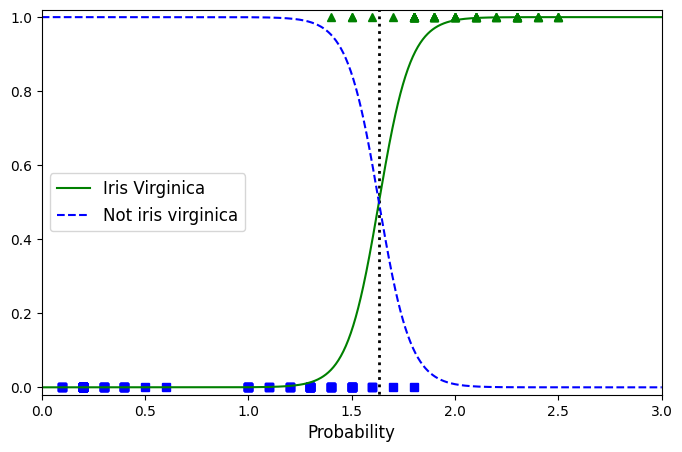

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new_c = np.c_[np.ones((1000, 1)), X_new]
y_proba = sigmoid(theta.T @ X_new_c.T)

decision_Boundary = X_new[y_proba.reshape(-1, 1) >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba.T, 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba.T, 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Aplicando la libreria sklearn la clase LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(C = 10**10)
model.fit(X, y.ravel())

LogisticRegression(C=10000000000)

[1.63363363]


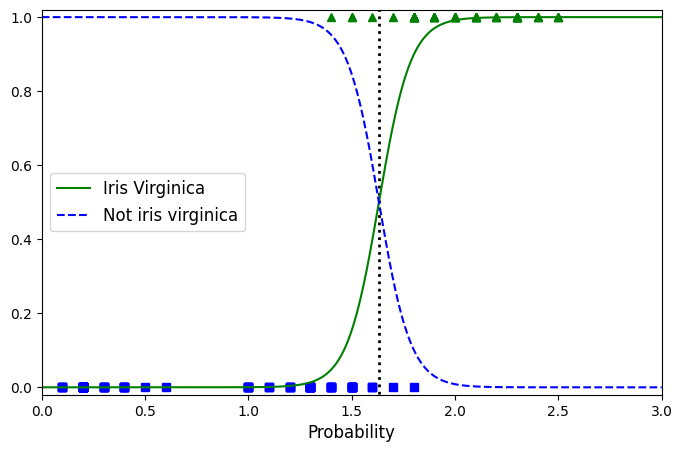

In [13]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

decision_Boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba[:, 1], 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [14]:
y_proba

array([[9.99999999e-01, 6.68990990e-10],
       [9.99999999e-01, 6.95514100e-10],
       [9.99999999e-01, 7.23088756e-10],
       ...,
       [2.18558172e-08, 9.99999978e-01],
       [2.10223556e-08, 9.99999979e-01],
       [2.02206778e-08, 9.99999980e-01]])

In [15]:
X = iris['data'][:, (2, 3)] #Petal length & pethal width (cm)
#y = (iris['target'] == 2).astype(int)
y = (iris['target']) #Multiclase

In [16]:
model = LogisticRegression(C = 10**10)
model.fit(X, y) 


LogisticRegression(C=10000000000)

In [17]:
model.intercept_

array([ 41.12285277,   2.07559001, -43.19844278])

In [18]:
model.coef_

array([[ -8.35272799, -17.97102461],
       [  1.29900607,   3.76191165],
       [  7.05372193,  14.20911297]])

In [19]:
y_proba = model.predict_proba(X)
left_right = np.array([0, 7])

boundary = -(model.intercept_[0] + 
             model.coef_[0][0] * left_right) / model.coef_[0][1]


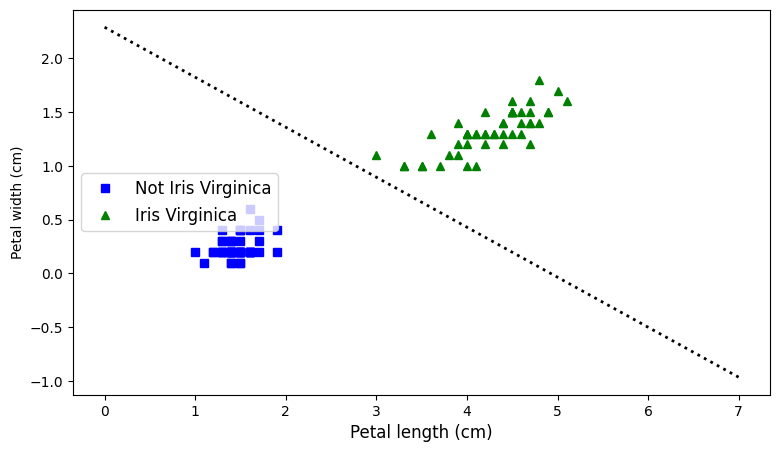

In [20]:
plt.figure(figsize = (9, 5))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label = 'Not Iris Virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^', markersize = 6, label = 'Iris Virginica')

plt.plot(left_right, boundary, 'k:', linewidth = 2)

plt.xlabel('Petal length (cm)', fontsize = 12)
plt.ylabel('Petal width (cm)', )
plt.legend(loc = 'center left', fontsize = 12)
plt.show()

In [21]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 500).reshape(-1, 1))

y_proba = model.predict_proba(X)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = model.predict(X_new)
zz = y_predict.reshape(x0.shape)

eft_right = np.array([0, 7])
boundary = -(model.intercept_[0] + 
             model.coef_[0][0] * left_right) / model.coef_[0][1]


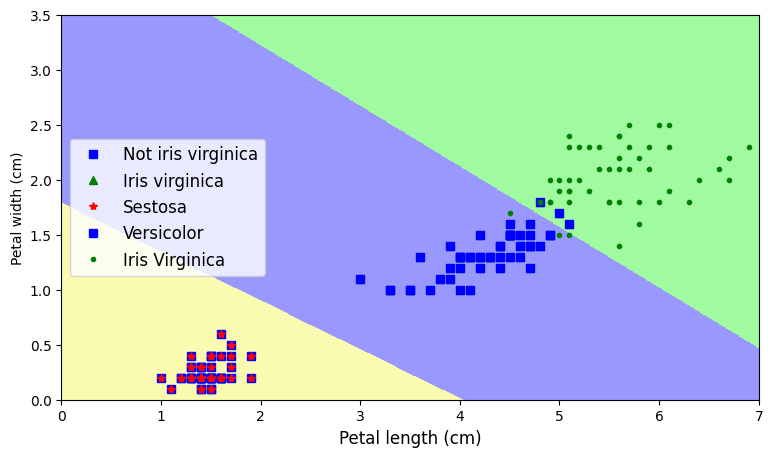

In [24]:
plt.figure(figsize = (9, 5))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label = 'Not iris virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^', markersize = 6, label = 'Iris virginica')

plt.plot(X[y == 0, 0], X[y == 0, 1], 'r*', label = 'Sestosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', markersize = 6, label = 'Versicolor')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g.', markersize = 6, label = 'Iris Virginica')


from matplotlib.colors import ListedColormap

custom_map = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(x0, x1, zz, cmap = custom_map)

#
# plt.plot(left_right, boundary, 'k:', linewidth = 2)

plt.xlabel('Petal length (cm)', fontsize = 12)
plt.ylabel('Petal width (cm)', )
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 7, 0, 3.5])
plt.show()